# Quickstart

https://nixtlaverse.nixtla.io/neuralforecast/docs/getting-started/quickstart.html

In [ ]:
from neuralforecast.utils import AirPassengersDF

In [ ]:
Y_df = AirPassengersDF
Y_df

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
...,...,...,...
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0
142,1.0,1960-11-30,390.0


In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS

import logging
logging.getLogger('pytorch_lightning').setLevel(logging.ERROR)

In [ ]:
horizon = 12

# Try different hyperparmeters to improve accuracy.
models = [LSTM(h=horizon,                    # Forecast horizon
               input_size=2 * horizon,       # Length of input sequence
               scaler_type='standard'),      # Type of scaler to normalize data
        
          NHITS(h=horizon,                   # Forecast horizon
                input_size=2 * horizon,      # Length of input sequence
                scaler_type='standard'),    
          ]
nf = NeuralForecast(models=models, freq='ME')
nf.fit(df=Y_df.iloc[:-horizon])

Seed set to 1
Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.


In [ ]:
Y_hat_df = nf.predict()
Y_hat_df

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,LSTM,NHITS
0,1.0,1960-01-31,384.015808,418.786743
1,1.0,1960-02-29,357.300629,398.443512
2,1.0,1960-03-31,404.376404,456.316956
3,1.0,1960-04-30,393.424561,446.829895
4,1.0,1960-05-31,411.836182,462.562622
5,1.0,1960-06-30,475.928375,543.372681
6,1.0,1960-07-31,553.120117,621.335999
7,1.0,1960-08-31,592.148010,628.416992
8,1.0,1960-09-30,470.670532,515.675598
9,1.0,1960-10-31,414.399689,452.904510


In [ ]:
Y_df.iloc[-horizon:]

,unique_id,ds,y
132,1.0,1960-01-31,417.0
133,1.0,1960-02-29,391.0
134,1.0,1960-03-31,419.0
135,1.0,1960-04-30,461.0
136,1.0,1960-05-31,472.0
137,1.0,1960-06-30,535.0
138,1.0,1960-07-31,622.0
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0


In [ ]:
from utilsforecast.plotting import plot_series

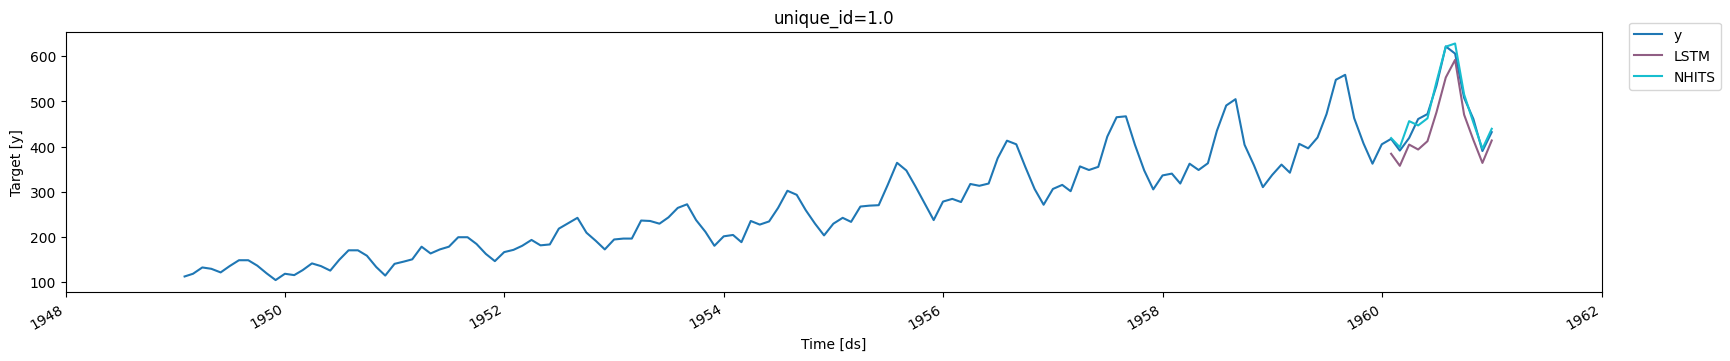

In [ ]:
plot_series(Y_df, Y_hat_df)